# Livrable 1 : Classification binaire

#### Date : 11/10/2023

#### Auteurs :
- Colin Hamerel
- Louis Brasseur
- Sofian Benazouzi
- Kevin Friedrich

## Sommaire : 

1. Description du projet
    * Explication du projet
    * Description des données
    * Objectifs attendus
1. Classification binaire
    * Introduction à la classification
    * Modèles de classification
    * Métriques de sélection du modèle
1. Explication du code
    * Initialisation de nos modèles
    * Entrainement de nos modèles
    * Calcul de nos métriques
1. Résultats Obtenus
1. Conclusion

## 1. Description du projet

#### 1.1 Explication du projet 

L'entreprise TouNum travaille sur la numérisation de documents (textes, images...). Leurs services sont souvent requis par des entreprises numérisant leur base de documents papier. Ils souhaitent étendre leur gamme de services pour inclure des outils de Machine Learning. En effet, certains de leurs clients ont une grande quantité de données à numériser, et un service de catégorisation automatique serait plus que valorisable. TouNum n'a pas dans son personnel de spécialiste du Machine Learning. L'entreprise fait appel à vous, les spécialistes en Data Science de CESI. On vous propose un premier contrat pour travailler sur une solution visant à analyser des photographies pour en déterminer une légende descriptive de manière automatique (du captioning).

#### 1.2 Description des données

Dans notre cas de figure nous avons 5 types d'images répartis chacun dans un dossier : 
- Les photos
- Les dessins
- Les peintures
- Les graphs
- Les schémas  

Ces 5 catégories vont être classifiées avec pour objectif de séparer les photos des autres images
- Les images dites "noisy"  

Ces images sont dans le dossier dataset, elles seront traîté durant le livrable 2 (Traitement d'images)

#### 1.3 Objectifs attendus 

Dans ce livrable nous allons charger nos données, les traiter avec différents réseaux de neurones afin de les classifier (photo/autre) et comparer la qualité de chacun des réseaux grâce aux résultats obtenus et à des facteurs pertinents, pour conclure et séléctionner la solution optimale dans notre cas de figure. L'objectif étant de déterminer le réseau répondant le mieux au besoin de classification avec nos images.

## 2. Classification binaire

#### 2.1 Introduction à la classification

En IA la classification est l’action de catégoriser une entrée dans une catégorie ou une classe en fonction de ses paramètres. Il existe deux types principaux de classifications :
-	La classification binaire, elle catégorise entre deux classes (Ex : Chat ou Chien)
-	La classification multi classe, contrairement à la binaire elle possède plus de deux catégories, l’objectif est donc de placer l’entrée dans celle correspondant le plus (Ex : Chat, Chien, Lapin ou Serpent)  

Dans notre cas de figure le type de classification est binaire, en effet même si nous avons plusieurs types d’images en entrée l’objectif est bien de sortir si oui ou non l’image est une photo (Photo / Pas Photo -> Binaire), même si dans un exemple plus réel il serait plus intéressant de séparer les classes. Et c'est pour cela que nous allons aussi nous intéresser aux performances des modèles en classfication binaire et "multi-classes".


#### 2.2 Modèles de classification

Pour choisir notre modèle de classification nous en avons présélectionné plusieurs pour les implémenter, les entraîner et enfin les comparer.  
Nous avons utilisé la liste des modèles proposés par Keras sur cet URL https://keras.io/api/applications/ qui sont des modèles connus dans la littérature scientifique afin de les utiliser directement.
Voici les 5 que nous avons sélectionnés :
-	Un premier modèle fait « à la main » en ajoutant nous même les couches et en les adaptant pour les optimiser, cela permettra de voir s’il peut concurrencer les modèles déjà existants.
-	VGG-19, il est connu pour sa simplicité relative par rapport à d'autres réseaux CNN plus complexes. Il est largement utilisé comme base pour le transfert de connaissances dans des tâches de classification d'images.
-	Resnet, extrêmement profond il est très performant en vision par ordinateur grâce à ses capacités à former des réseaux profonds sans rencontrer de problèmes de rétropropagation du gradient.
-	Xception, connu pour sa capacité à extraire des caractéristiques précises et pour sa légèreté relative en termes de paramètres. Il est souvent utilisé pour la classification d'images, la détection d'objets, et d'autres tâches de vision par ordinateur.  
-   Mobilenet, utilise une architecture de réseau de neurones convolutifs profonds, mais elle est conçue pour être légère en termes de paramètres et de calculs. Cela permet au modèle de fonctionner rapidement même sur des appareils mobiles moins puissants.

Chacun de ces réseaux a ses avantages et inconvénients. Le choix dépend de la tâche de classification spécifique à accomplir, de la quantité de données disponibles, de la puissance de calcul disponible, et d'autres facteurs. C’est pour cela qu’on va les comparer pour notre cas de figure et voir s’il est possible d’adapter suffisamment le modèle a la main qui est plus flexible mais probablement moins efficace que les autres.



#### 2.3 Métriques de séléction du modèle

Afin de comparer nos résultats nous avons utilisé des métriques d’évaluation : 
-	Precision (Précision) : C'est la mesure la plus basique et la plus intuitive, qui indique la proportion de prédictions correctes parmi toutes les prédictions.
- Accuracy (Exactitude) : C'est la mesure de la capacité d'un modèle à classifier correctement tous les exemples, qu'ils soient positifs ou négatifs.
-	Loss (Perte) : C’est une fonction qui compare les valeurs de sortie cible et prévue. Lors de la formation, nous visons à minimiser cette perte entre les résultats prévus et cibles.
-	Recall (Rappel) : Le rappel mesure la proportion de vrais positifs parmi tous les exemples réels positifs. Il est important lorsque les faux négatifs sont coûteux.
-	F1-score : Le score F1 est une mesure harmonique qui combine la précision et le rappel. Il est utile lorsque vous voulez équilibrer la précision et le rappel.  

Nous avons aussi tracé les courbes d’apprentissage de chacun des réseaux de neurones pour les comparer.


## 3. Explication du code

#### 3.1 Implémentation d'un modèle

Dans un premier temps nous avons implémentés les bibliothèques, scripts et modèles nécessaires puis nous avons chargé nos les données.

Et pour mener a bien l'exécution, il faut changer ***les variables de "path" dans le .env ainsi que respecter le format pour les données d'entrés*** : 

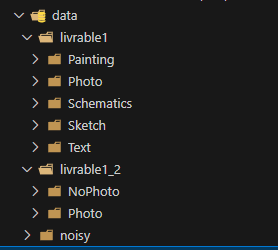

- Pour un dataset en classement multi-classes, il faut un dataset dans le dossier dans lequel chaque dossier représente le label correspondant à l'image (exemple : le dossier "livrable1" sur le screenshot ci-dessus)
- Pour un dataset en classement binaire, il faut uniquement 2 dossier avec le nom de dossier comme label (exemple : le dossier 'livrable1_2')

In [ ]:
%load_ext autoreload
%autoreload 2

import tensorflow as tf

import pathlib
import matplotlib.pyplot as plt
import os
from PIL import Image
import numpy as np
import sys

import dotenv
dotenv.load_dotenv('/home/cesi/datascience/.env')

# ---------------| PATHS |--------------- #
# CHANGER LES PATHS DANS LE FICHIER .env !!!!!!!!!!!!!!
data_multi_path = os.environ.get('DATA_MULTI_PATH')
data_binary_path = os.environ.get('DATA_BINARY_PATH')
script_path = os.environ.get('SCRIPT_PATH')
weight_path = os.environ.get('WEIGHT_PATH')
models_path = os.environ.get('MODELS_PATH')

sys.path.insert(0, script_path)
sys.path.insert(1, models_path)

# scripts
import plotResults
import createTrainingData

# models
import resnet50
import homemade
import vgg19
import xception
import mobilenet

Après l'import de tous nous models on choisit le nom de celui que nous allons tester (model_choosen), on définit différents paramètres dont : 
- Le modèle que l'on souhaite entrainer
- La taille de nos images (image_h, image_w)
- La taille de notre "batch" qui correspond au nombre d'échantillons utilisés dans un passage aller-retour à travers le réseau de neurones (batch_size)
- Le nombres d'époques donc d'itérations qui vont être exécutées durant l'entraînement du modèle (epochs)
- Le choix du type de classification entre binaire et multi classe (binary)
- Le chemin d'accès aux données selon le type de classification choisi (data_dir)

In [ ]:
# ---------------| VARIABLES |--------------- #


# CHOISIR LE MODELE A UTILISER

model_choosen = 'resnet50'
# model_choosen = 'homemade'
# model_choosen = 'vgg19'
# model_choosen = 'xception'
# model_choosen = 'mobilenet'

# Taille de l'image (resacaling)
image_h, image_w = 150, 150
# Taille des batchs
batch_size = 32
# Minimum de pixels pour que l'image soit considérée comme une image
min_h = 25
min_w = 25

# Nombre d'epochs
epochs = 15

# Si on veut faire une classification binaire ou multi
binary = False

# Choisir le bon path selon les données que l'on veut utiliser
if(binary):
    data_dir = data_binary_path
else:
    data_dir = data_multi_path


<!-- Après l'initialisation du nom du modèles et de ses paramètres on sépare les sets d'entrainement et de test en 80/20% et on implémente les paramètres. -->
Une fois nos différents paramètres déterminés, nous allons préparé notre dataset. Pour se faire, nous divisons notre dataset entre entrainement et test, respectant une proportion de 80% pour l'entrainenement et 20% pour le test.

In [ ]:
# Alimentation des train/test set
train_set, test_set = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=.2,
  subset='both',
  image_size=(image_h, image_w),
  seed=42,
  batch_size=batch_size
)

# Définition des classes et du nombre de classes
class_names = train_set.class_names
num_classes = len(class_names)

Grâce à la variable model_choosen, nous initialisons le modèle désiré.

In [ ]:
match(model_choosen):
    case 'resnet50':
        model = resnet50.build((image_h, image_w), num_classes)
    case 'homemade':
        model = homemade.build((image_h, image_w), num_classes)
    case 'vgg19':
         model = vgg19.build((image_h, image_w), num_classes)
    case 'xception':
        model = xception.build((image_h, image_w), num_classes)
    case 'mobilenet':
        model = mobilenet.build((image_h, image_w), num_classes)

#### 3.2 Entrainement de nos modèles

Lors de cette étape charnière, nous procédons à l'entrainement de nos modèles. Afin de repertorier nos modèles entrainés convenablement, nous créons au préalable de chacun de nos entrainements, un dossier qui contiendra diverses données comme:
- La taille de nos images
- Le mode de classification (binaire ou multi-classe)
- La taille du batch
- Le nom du modèle
- La configuration du modèle (fonction de perte, optimiseur, ...)
- L'architecture du modèle présentant chaque couche détaillée.

Une fois les informations de l'entrainement sauvegardées, nous déterminons un point de sauvegarde. Celui-ci nous permettra d'enregistrer nos poids à différents chaque points clés de notre entrainement. Nous avons choisi de les sauvegarder à chaque époques afin d'avoir le choix du modèle le plus optimisé. Une époque représente un passage de l'entièreté de nos données dans le modèle.

Après avoir configuré nos points de sauvegarde, nous passons à l'entrainement en tant que tel. Lors de cette étape, nous fournissons les données d'entrainement, le nombre d'époque, les données de tests ainsi que nos points de sauvegardes réguliers.

Durant l'apprentissage de notre modèle, nous récoltons plusieurs métriques afin de suivre son évolution et de par la suite sélectionner le meilleur. Les données suivies sont la perte et l'accuracy sur le set d'entrainement et de test.

Une fois les données récupérées, nous sauvegardons nos données au travers d'un graphique qui nous permettra d'avoir une idée claire et rapide des performances du modèle à chaque époque.

In [ ]:
# Création du dossier de sauvegarde regroupant toutes les informations de l'entrainement
path = createTrainingData.create_training_data(weight_path, model, model_choosen, num_classes, image_h, image_w, batch_size)

# Création des points de sauvegarde du modèle
checkpoint_path = path+"/cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
weights_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq='epoch')

# Entrainement du modèle
history = model.fit(train_set, epochs=epochs, validation_data=test_set, callbacks=[weights_callback])

# Récupération des métriques du modèle 
epochs_range = range(epochs)
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

# Affichage graphique des métriques (accuracy et loss)
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

# Sauvegarde du graphique des métriques
plt.savefig(path+"/metrics.png")

plt.show()

Une fois notre modèle entrainé, nous pouvons charger les poids de notre modèle à n'importe quelle étape de l'entrainement.

In [ ]:
# Load de la meilleur epoch
# A decommenter seulement si on souhaite charger des poids

# model_to_load_path = weight_path+"xception_multi/cp-0009.ckpt"
# model.load_weights(model_to_load_path)

Nous réalisons des prédictions sur le jeu de test à l'aide de notre modèle puis évaluons sa pertinence avec la loss et l'accuracy

In [ ]:
predictions = model.predict(test_set)
print('---------')
loss, acc = model.evaluate(test_set)

Nous formattons nos données de tests afin de pouvoir les manipuler et y accéder plus facilement.

In [ ]:
full_tests_images = []
full_tests_labels = []
for i,(batch_images, batch_labels) in enumerate(test_set):
    for im in batch_images:
        full_tests_images.append(im)
    for res in batch_labels:
        full_tests_labels.append(int(res))

Et nous affichons les résultats de notre set de tests. Pour chacune de nos images, nous présentons la prédiction faite accompagnée de la réponse. 
De plus, nous ajoutons les différentes probabilité de prédiction. Cela nous permet de voir si notre a des incertitudes.

In [ ]:
plotResults.plot_results(num_classes == 2, predictions, full_tests_labels, full_tests_images, class_names, path)

On compte ensuite le nombre de vrais positifs, faux positifs, vrais négatifs et faux négatifs pour pouvoir calculer les métriques du modèle et les stocker dans un fichier nommé 'metrics.txt'

In [ ]:
tp = 0
fp = 0
fn = 0
tn = 0
default_class_name = 'Photo'

for i in range(len(predictions)):
    if num_classes == 2:
        predicted_label = np.where(predictions[i][0] < 0.5, 'Non-photo', 'Photo')
    else:
        predicted_label = class_names[np.argmax(predictions[i])]
    true_label = class_names[full_tests_labels[i]]

    if true_label == default_class_name and predicted_label == default_class_name:
        tp += 1
    elif true_label == default_class_name and predicted_label != default_class_name:
        fn += 1
    elif true_label != 'Photo' and predicted_label == 'Photo':
        fp += 1
    elif true_label != 'Photo' and predicted_label != 'Photo':
        tn += 1

precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1 = 2 * (precision * recall) / (precision + recall)
accuracy = (tp + tn) / (tp + tn + fp + fn)

print("True positif: ", tp)
print("False positif: ", fp)
print("False negatif: ", fn)
print("True negatif: ", tn)
print('-------------------------------')

print("Precision: ", precision)
print("Recall: ", recall)
print("F1: ", f1)
print("Accuracy: ", accuracy)
print('-------------------------------')
print("Confusion Matrix : ")
print(f"[{tp}] [{fp}]")
print(f"[{fn}] [{tn}]")


# Save all the metrics in a txt file
f = open(path+"/metrics.txt", "w")
f.write("True positif: "+str(tp)+"\n")
f.write("False positif: "+str(fp)+"\n")
f.write("False negatif: "+str(fn)+"\n")
f.write("True negatif: "+str(tn)+"\n")
f.write('-------------------------------\n')
f.write("Precision: "+str(precision)+"\n")
f.write("Recall: "+str(recall)+"\n")
f.write("F1: "+str(f1)+"\n")
f.write("Accuracy: "+str(accuracy)+"\n")
f.write('-------------------------------\n')
f.write("Confusion Matrix : \n")
f.write(f"[{tp}] [{fp}]\n")
f.write(f"[{fn}] [{tn}]\n")
f.close()

#### 3.3 Maintenance

Nous pouvons ainsi dire qu'après avoir mis l'accent sur la capacité d'adapter notre fichier aux différents modèles pour pouvoir tous les tester et les comparer on obtient un fichier flexible, simple d'utilisation et maintenable. De plus l'ajout de text en markdown entre les blocs de codes et les commentaires ajoutés directement dedans une personne même peu expérimentée sur ce sujet pourrait utiliser ce notebook.

## 4. Résultats obtenus

### 4.1 Comparaison des performances des modèles

Afin de comparer nos modèles, nous utiliserons principalement les métriques d'accuracy et de loss 

#### 4.1.1 Accuracy

Voici le graphique avec les valeurs d'accuracy de nos différents modèles :

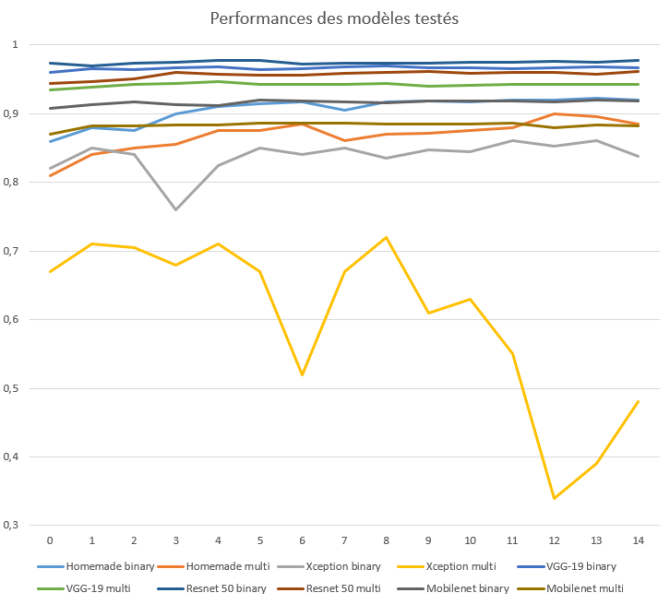

On peut donc voir que certains modèles sont très efficaces et que d'autres au contraire (comme le Xception multi-classes) sont beaucoup moins bons.

On peut donc faire une moyenne des résultats de toutes les époques et voici le graphique de la moyenne de l'accuracy des modèles :

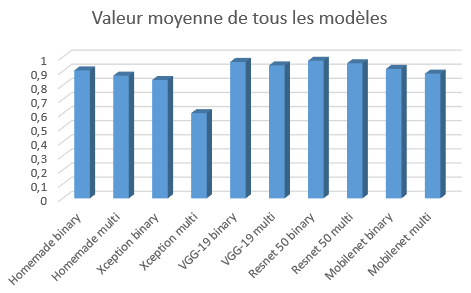

On peut donc voir que les modèles en classification binaire sont plus performants que les modèles en classification multi-classes.

Et dans les 2 cas, le modèle ResNet50 est le meilleur en classification binaire et en classification multi-classes.

#### 4.1.2 Loss

Pour ce qui est de la loss ici on va chercher à minimiser la valeur, et voici le graphique des valeurs cumulées :

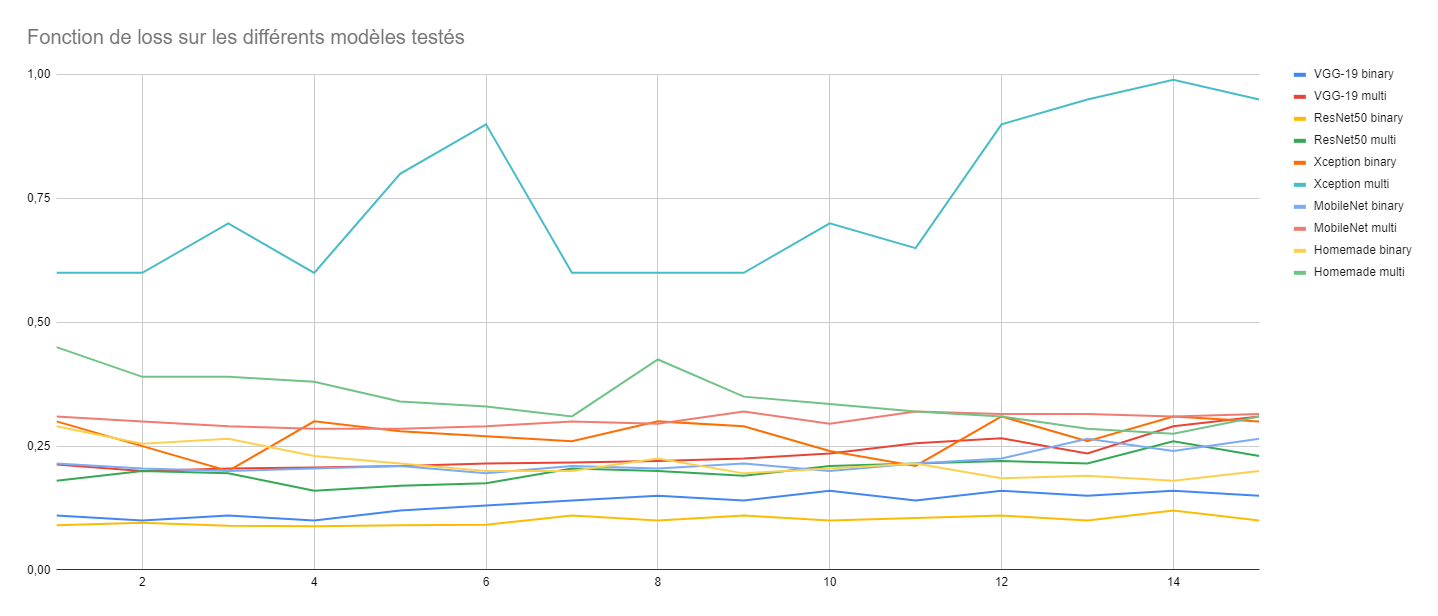

On peut donc voir la moyenne des valeurs : 

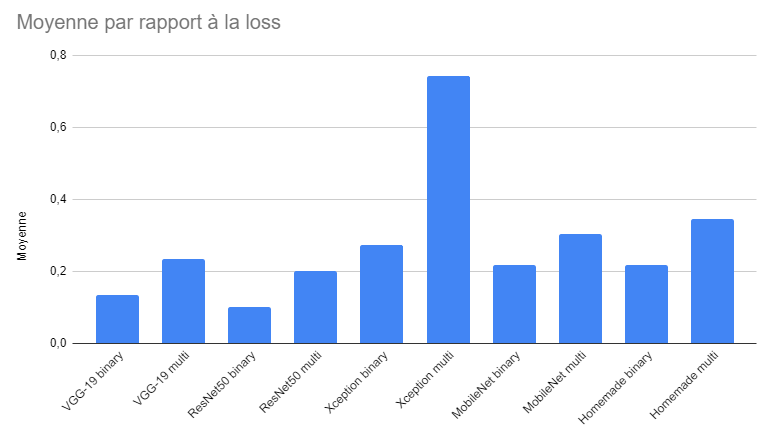

Tout comme pour l'accuracy, on peut voir que le ResNet50 en binary est bien le modèle le plus performant et qu'en multi-classes, ce modèle reste aussi le plus performant.

### 4.2 Amélioration du molèle séléctionné

Lors des précédents entrainements les valeurs retenu pour la loss et l'accuracy sont (en moyenne): 

- Accuracy : 0.974
- Loss : 0.099  

Nous avons donc séléctionné le modèle ResNet50 (et on choisira entre classification binaire ou multi-classes par la suite), pour accélérer les performances nous avions préalablement réduit la taille des images traitées mais maintenant nous allons utiliser une taille d'image de **448x448** pixels (limité par la puissance de traitement des machines, si on choisit une valeur supérieur les ordinateurs ne peuvent pas éxécuter le code). 

Nous avons donc entrainé notre modèle sur 5 époques (limité par le temps d'éxécution) et voici les résultats : 

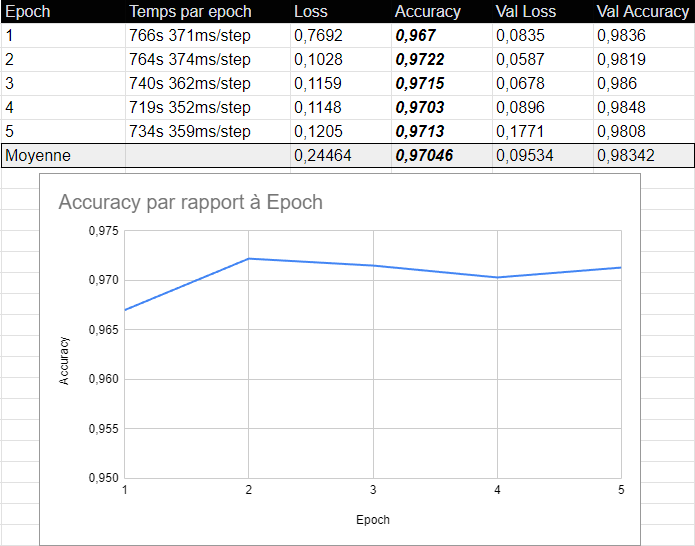

On peut donc remarquer que notre validation accuracy et notre validation loss ont respectivement augmenté et diminué. Ce qui signifie que notre modèle a pu s'améliorer avec des images plus grandes.

Les nouvelles valeurs sont donc : 

- Accuracy : 0.983
- Loss : 0.095




## 5. Conclusion

Nous avons donc un modèle qui permet donc de classifier nos images en 2 catégories (Photo et Non-Photo) de manière plutôt précise (avec une accuracy de 0.983 à la fin) et une loss très minime (une loss fonction de 0.095).

Donc dans un cas classification binaire ce modèle est très performant, cependant dans un cas plus réel nous voudrions classifier nos images en plusieurs catégories (les catégories définies de base). Ce qui est aussi possible avec notre modèle choisi **ResNet50** mais au détriment de la précision.

Par la suite nous déciderons de la stratégie que nous souhaiteront adopter.